<a href="https://colab.research.google.com/github/avegat/DCDP/blob/main/Copia_de_3_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/3_MonteCarlo.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción a los métodos de Monte Carlo con Python](#a)   
* [Monte Carlo Estacionario](#b)
* [Monte Carlo Transitorio](#c)
* [Referencias](#f)

<a id="a"></a>
<h1><center>2.10. Introducción - Monte Carlo</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif)


![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)

Los métodos de Monte Carlo (MC) son un subconjunto de algoritmos computacionales que utilizan el proceso de muestreo aleatorio repetido para realizar estimaciones numéricas de parámetros desconocidos.

---

Permiten modelar situaciones complejas en las que intervienen muchas variables aleatorias y evaluar el impacto del riesgo.

Los usos de MC son increíblemente amplios y han llevado a una serie de descubrimientos revolucionarios en los campos de la física, la teoría de juegos y las finanzas, entre otros muchos....

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas. Espero esbozar algunos de los principios básicos de MC, y tal vez compartirles un poco de la emoción que tengo sobre sus posibles aplicaciones.

**NOTA: El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen.**

![img](https://i.imgur.com/EGbQfMo.gif)

### Objetivos

* Aprender como describir fenómenos naturales
* Una breve introducción a diferentes modelos
* ¿Cómo usar estos modelos se pueden simular en una computadora?

## Ejemplos de fenómenos naturales

* Mecánica de fluidos, astrofísica, química, climatología
* Ciencias ambientales (modelado de un río, de un volcan)
* Competencia entre especies, comportamiento de hormigas... etc

## ¿Qué es un modelo?

* Varias definiciones posibles...
  * Simplificación de realidades abstractas, permitirnos un mejor entendimiento y descripción de éstos.
  * Una abstracción donde sólo los "ingredientes esenciales" se mantienen, de acuerdo a ciertas preguntas acerca del sistema
  * Representación de un fenómeno matemático o basado en un lenguaje computacional

## Modelado y simulación

Es una parte importante de la computación.

  * Describir, clasificar
  * Entendimiento
  * Predicción
  * Control de fenómenos

## Algunos ejemplos de métodos de modelado

* Dinámica molecular
* Ecuaciones matemáticas
* Métodos monte carlo (equilibrio, dinámica...)
* Autómatas celulares
* Sistemas multi-agentes
* Simulación de eventos discretos

## Del modelo a la simulación

Una vez que se ha identificado el modelo, uno necesita "programarlo", "ejecutarlo" (muchas veces) y estudiar los resultados

* Comprensión del programa computacional, de algoritmos, estructuras de los datos, análisis de los datos/resultados
* Verificar, validar y evaluar predicciones

## Modelado de espacio/tiempo y evolución del tiempo

Los procesos naturales ocurren en el espacio y evolucionan con el tiempo...

Por ejemplo, la temperatura ambiental es diferente de un lugar a otro y cambia con el tiempo.

* Un coche cambia su posición con respecto al tiempo...
* En ocasiones, uno sólo está interesado en la evolución del tiempo de una cantidad, independiente de su localización *espacial* en una población
* Además, podemos tener procesos estacionarios....

---

En la evolución del tiempo, la duración de un proceso se puede *descomponer* en pequeños intervalos de tiempo $\Delta$T y podríamos describir el estado del **sistema** en cada uno de estos pasos..

$$ t_0 = 0, t_1 = \Delta t, ... ,t_n = n\Delta t... $$

## Breve ejemplo

Si quisiéramos encontrar la probabilidad de obtener blackjack (un as junto con una carta de valor diez), podríamos simplemente contar el número de manos posibles donde este es el caso y dividir por el número total de combinaciones posibles de cartas para obtener la probabilidad (es alrededor de 1/21, si tiene curiosidad).

---

Pero ahora imagine que nuestro espacio muestral es mucho más difícil de calcular, por ejemplo, nuestra baraja de cartas tiene miles en lugar de solo 52 cartas, o mejor aún, ni siquiera sabemos cuántas cartas hay. Hay otra forma de encontrar esta probabilidad.

![img](https://media2.giphy.com/media/l2Sq2mPVJr4tfk436/giphy.gif)


Podríamos acomodarnos en la mesa y jugar cien juegos, registrando los resultados mientras jugamos.

Podríamos obtener un blackjack 19, 20 o incluso 28 veces, y asignar la probabilidad usando cualquiera de esos valores. Parece una forma bastante mala de evaluar nuestras probabilidades en el casino, pero es de esperar que solo estemos jugando por diversión. Ahora, si vamos de nuevo y jugamos mil, diez mil, millones de veces, la [Ley de los Números Grandes](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) establece:

**A medida que aumenta el número de variables generadas aleatoriamente distribuidas de manera idéntica, su media (promedio) se aproxima a su media teórica.**

Además de ser fácilmente una de las leyes de la estadística más importantes, esta es la base para las simulaciones de Monte Carlo y nos permite construir un modelo estocástico mediante el método de ensayos estadísticos. Veamos mi ejemplo favorito (y probablemente el más simple) de una estimación de [MC](https://www.statisticshowto.com/monte-carlo-simulation/).

## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **[algoritmo Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

**import [random](https://docs.python.org/3/library/random.html)** - Este módulo implementa generadores de números pseudoaleatorios para varias distribuciones.

**seed** - El método seed () se utiliza para inicializar el generador de números aleatorios.

El generador de números aleatorios necesita un número para comenzar (un valor inicial), para poder generar un número aleatorio.

**<font color=red>Nota: De forma predeterminada, el generador de números aleatorios utiliza la hora actual del sistema.</font>**

In [1]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

## Estimación Monte Carlo de Pi

Como a todos nos enseñan en geometría de la escuela.... **pi** es una constante que representa la relación entre la circunferencia y el diámetro de un círculo. Es irracional, lo que significa que tiene infinitos dígitos que no siguen ningún patrón. ¿Me creerías si te dijera que podemos estimar pi en tantos dígitos como queramos simplemente jugando a los dardos? Con cierto grado de incertidumbre, por supuesto, ¡después de todo estamos jugando un juego de azar! Vamos a escribir un breve script de Python para ver cómo.

In [2]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

Debemos realizar la siguiente fórmula para obtener aquellos puntos que caen dentro del círculo con respecto a los que pertenecen al área del cuadrado simulado:


![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1-1.png)

----

Además, sabemos de cierta forma que el cálculo de las áreas sería de la siguiente manera:

![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/pm2.png)

Debemos seguir el siguiente proceso general:

   * Generamos dos números aleatorios entre -1 y 1
   * Calculamos $X^{2} + Y^{2}$
   
      *  Si el valor es <= 1 estaremos dentro del círculo
      *  Si el valor es > 1 estaremos enconces fuera del círculo
      *  Calculamos el número total de veces (puntos) que están dentro del círculo y dividimos entre el total de intentos.  Así obtenemos la probabilidad (aproximada) de caer en el cículo.
      
Con esa probabilidad podremos aproximar el valor de PI, y repetiremos el experimento un número de veces determinadas para obtener diferentes aproximaciones. Nunca va a ser exacto.

Si ya conoces un poco de esto, te habrás dado cuenta de que estamos haciendo una pequeña trampa: solo estamos usando el cuadrante superior derecho del círculo y del cuadrado (un 25 %; En caso de simular datos aleatorios entre 0 y 1).

Si quisiéramos usar toda la superficie, deberíamos generar números entre -1 y 1. OJO: siempre suponiendo que nuestro origen de coordenadas está en el centro del círculo.

El código final es el siguiente, es bastante fácil de entender:

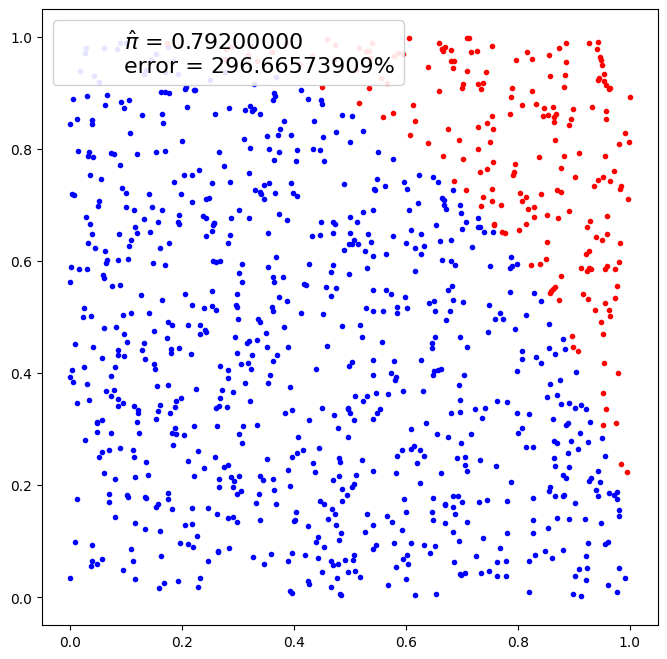

In [3]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(0, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1

    interior = (x**2 + y**2) <= 1

    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

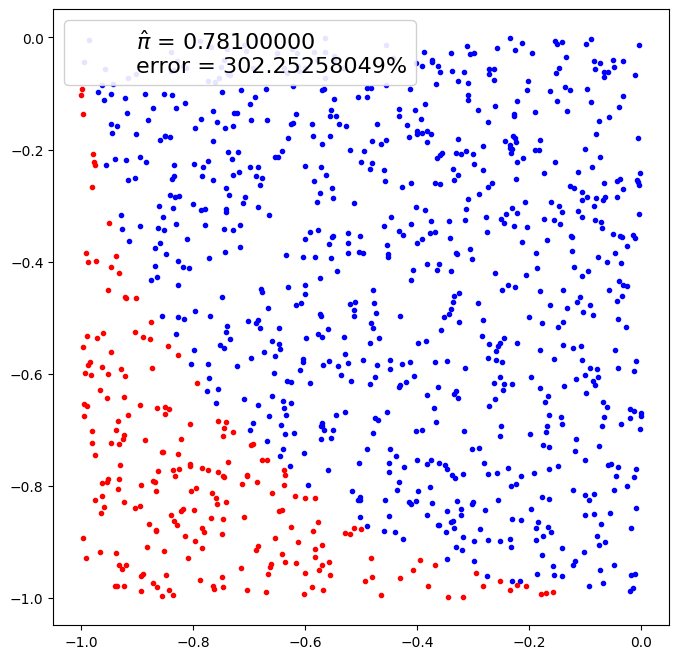

In [4]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 0, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1

    interior = (x**2 + y**2) <= 1

    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

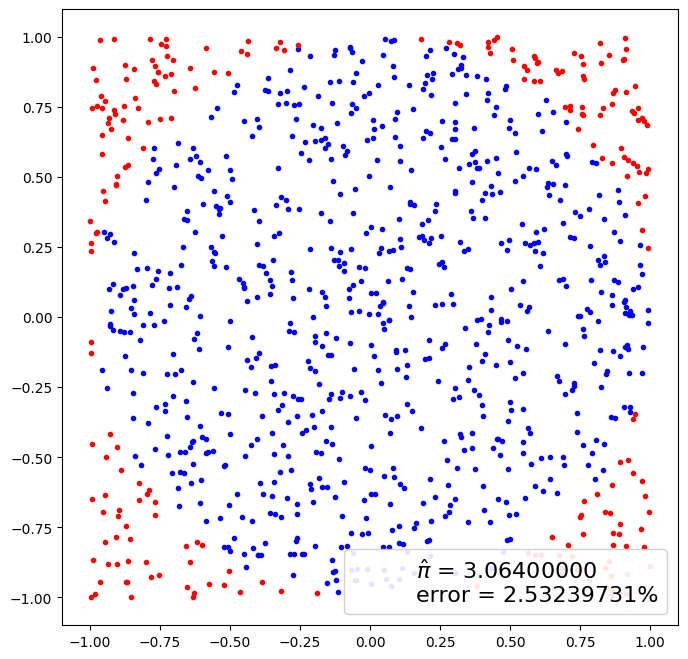

In [5]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de -1 a 1
    #Lo anterior tiene la finalidad de llenar un cuadrado de 2 dimensiones en el intervalo -1 a 1
    #para posteriormente realizar una comparación de aquellos puntos que caen dentro de la función definida para
    #la circunferencia que es X^2 + Y^2 <= 1
    interior = (x**2 + y**2) <= 1

    # El valor de 4 es debido a los cuadrantes que estamos ocupando
    pi = interior.sum()* 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

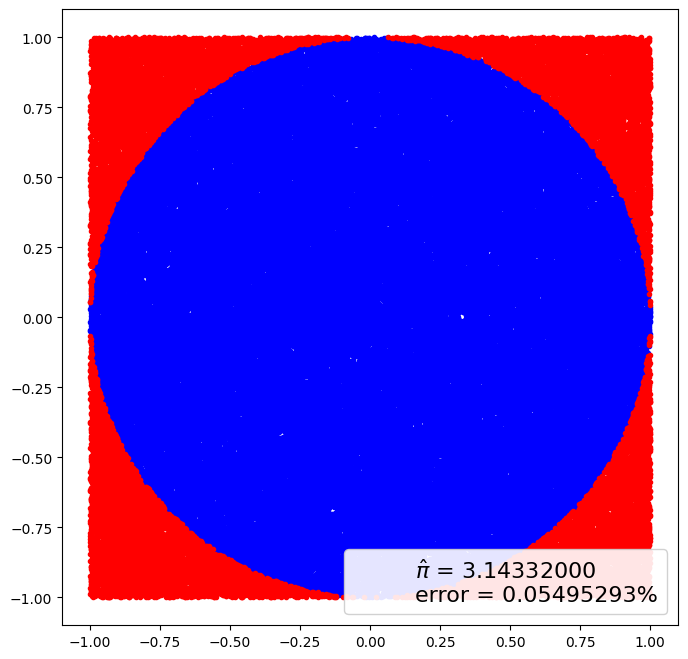

In [6]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

# Ejemplo práctico

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto.

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$$Monto de la comisión = Ventas reales * Tasa de comisión$$

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: *Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?


----


Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.

<a id="b"></a>
<h1><center>2.11. Monte Carlo Estacionario</center></h1>

[Regreso a contenido](#contenido)

---

Ahora que hemos cubierto el problema a un alto nivel, podemos discutir cómo el análisis de Monte Carlo podría ser una herramienta útil para predecir los gastos de comisiones para el próximo año. En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar el proceso manual que comenzamos anteriormente, pero ejecutamos el programa cientos o incluso miles de veces y obtendremos una distribución de los montos de comisiones potenciales.

Esta distribución puede informar la probabilidad de que el gasto esté dentro de una ventana determinada. Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud. Podemos desarrollar una idea más informada sobre el riesgo potencial de un presupuesto excesivo o insuficiente.

------------

Hay dos componentes para ejecutar una simulación de Monte Carlo:

  * la ecuación para evaluar
  * las variables aleatorias para la entrada

Ya hemos descrito la ecuación anterior. Ahora debemos pensar en cómo poblar las variables aleatorias.

Un enfoque simple sería tomar un número aleatorio entre 0% y 200% (que representa nuestra intuición sobre las tasas de comisiones). Sin embargo, debido a que pagamos comisiones todos los años, entendemos nuestro problema con un poco más de detalle y podemos usar ese conocimiento previo para construir un modelo más preciso.

Debido a que hemos pagado comisiones durante varios años, podemos observar una distribución histórica típica del porcentaje al objetivo:

![img](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

### Construyendo el modelo... en Python

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Para este modelo, usaremos una generación de números aleatorios de numpy. El aspecto útil de numpy es que hay varios generadores de números aleatorios que pueden crear muestras aleatorias basadas en una distribución predefinida.

Como se describió anteriormente, sabemos que nuestro porcentaje histórico de rendimiento objetivo se centra en una media del 100% y una desviación estándar del 10%. Definamos esas variables, así como la cantidad de representantes de ventas y simulaciones que estamos modelando:

In [46]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [47]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)

In [10]:
pct_to_target

array([1.0144, 0.9096, 1.0544, 1.0182, 0.8659, 0.9388, 1.1331, 0.8836,
       0.8826, 0.9749, 1.1066, 0.8011, 0.9722, 0.9221, 1.1176, 1.0699,
       0.8412, 0.9142, 0.9505, 0.8716, 1.0941, 1.0323, 0.9913, 1.016 ,
       0.9323, 0.9807, 1.0968, 1.0141, 1.1369, 0.9342, 0.9518, 0.9721,
       0.9514, 1.0807, 1.036 , 0.9533, 0.9599, 0.9397, 1.0015, 1.0474,
       0.992 , 0.8411, 0.9033, 1.0761, 1.0399, 1.0832, 1.0005, 1.0062,
       0.8939, 1.0327, 1.0722, 0.9769, 1.0506, 1.1579, 0.957 , 1.1625,
       0.8893, 0.9152, 1.0231, 1.1221, 0.9602, 1.1108, 1.0941, 0.982 ,
       1.05  , 1.0599, 1.0412, 0.9901, 0.9844, 1.1451, 1.1673, 0.9223,
       1.1219, 1.1432, 1.0034, 0.905 , 1.0862, 1.033 , 0.8762, 0.9767,
       0.8173, 1.0757, 0.88  , 0.9102, 1.0946, 0.7828, 1.1808, 0.9577,
       1.0399, 1.0137, 1.2204, 0.806 , 1.2201, 0.8447, 1.0671, 1.0593,
       1.0491, 1.034 , 1.1362, 0.8617, 0.975 , 1.0671, 0.977 , 0.9876,
       0.9206, 0.9943, 0.9645, 1.0605, 0.8571, 0.8757, 1.0504, 0.8936,
      

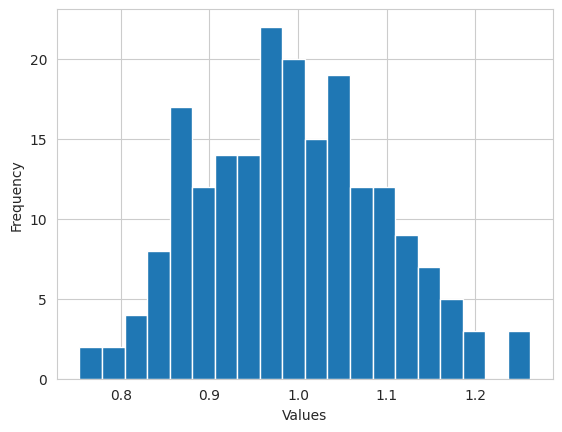

In [48]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(pct_to_target, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Dado que estamos tratando de hacer una mejora en nuestro enfoque simple, vamos a seguir con una distribución normal para el porcentaje objetivo. Sin embargo, al usar numpy, podemos ajustar y usar otra distribución para modelos futuros si es necesario....

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:

![img](https://pbpython.com/images/monte_carlo_sales_target.png)

[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [49]:
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

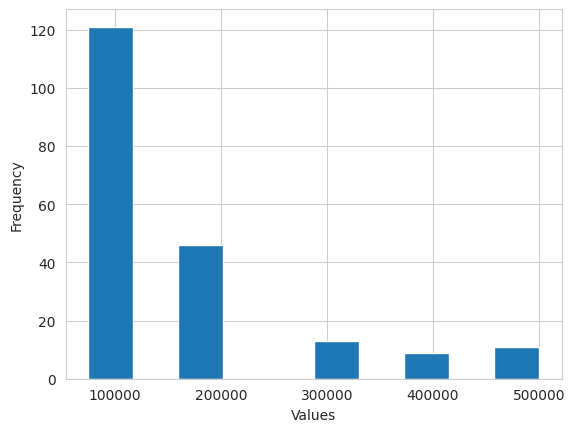

In [50]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(sales_target, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

In [51]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})



df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [15]:
df

,Pct_To_Target,Sales_Target,Sales
0,1.0144,200000,202880.0
1,0.9096,75000,68220.0
2,1.0544,100000,105440.0
3,1.0182,300000,305460.0
4,0.8659,200000,173180.0
...,...,...,...
495,1.0005,75000,75037.5
496,1.0926,400000,437040.0
497,1.1056,75000,82920.0
498,1.1085,100000,110850.0


Puede notar que hice un pequeño truco para calcular el monto real de las ventas. Para este problema, la cantidad real de ventas puede cambiar mucho a lo largo de los años, pero la distribución del rendimiento sigue siendo notablemente constante. Por lo tanto, estoy usando las distribuciones aleatorias para generar mis entradas y respaldar las ventas reales.

La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:



In [24]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

El beneficio adicional de usar Python en lugar de Excel es que podemos crear una lógica mucho más compleja que es más fácil de entender que si intentáramos construir una declaración if anidada compleja en Excel.

Ahora creamos nuestra tasa de comisión y la multiplicamos por las ventas:

In [17]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [18]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.0144,200000,202880.0,0.04,8115.2
1,0.9096,75000,68220.0,0.03,2046.6
2,1.0544,100000,105440.0,0.04,4217.6
3,1.0182,300000,305460.0,0.04,12218.4
4,0.8659,200000,173180.0,0.02,3463.6


¡Ahí está!

Hemos replicado un modelo que es similar a lo que hubiéramos hecho en Excel, pero usamos algunas distribuciones más sofisticadas que simplemente arrojar un montón de entradas de números aleatorios al problema.

Si sumamos los valores (solo los 5 primeros se muestran arriba) en la columna Commission_Amount, podemos ver que esta simulación muestra que pagaríamos de...

In [19]:
df['Commission_Amount'].sum().round(2)

2797334.7

### Hagamos más repeticiones...

La verdadera *magia* de la simulación de Monte Carlo es que si ejecutamos una simulación muchas veces, comenzamos a desarrollar una imagen de la distribución probable de los resultados.

Además de ejecutar cada simulación, guardamos los resultados que nos interesan en una lista que convertiremos en un **dataframe** para un análisis más detallado de la distribución de resultados.

Aquí el código...



In [20]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [21]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [22]:
results_df.describe().round(2).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,778,069.0","2,861,570.03","83,763,525.0"
std,"2,641,042.48","99,796.79","2,612,223.46"
min,"75,158,000.0","2,578,050.0","75,250,000.0"
25%,"81,980,687.5","2,795,195.25","81,943,750.0"
50%,"83,696,750.0","2,858,925.0","83,650,000.0"
75%,"85,450,125.0","2,922,625.75","85,475,000.0"
max,"91,792,250.0","3,183,365.0","92,650,000.0"


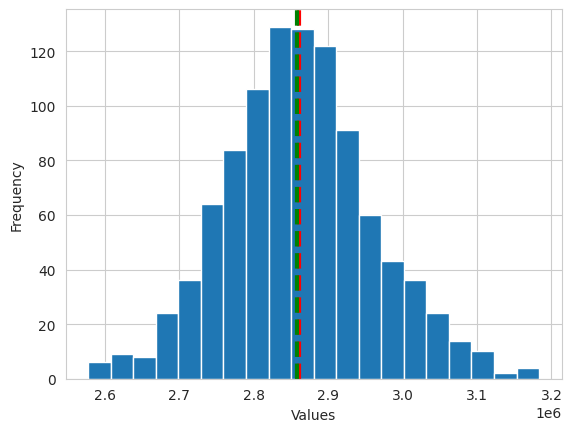

In [23]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo.

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente la tasa de comisión máxima al 5%
  *  Disminuir el número de vendedores.
  *  Cambiar la desviación estándar esperada a una cantidad mayor
  *  Modificar la distribución de objetivos



In [93]:
#Aumente la tasa de comisión máxima al 5%
def calc_commission_rate(x): #x =Pct_TO_Target.   agregar 5% extra a la comisiòn actual
    """ Con base a la tabla de comisiones:
    0-90% = 3%
    91-99% = 4%
    >= 100 = 5%
    """
    if x <= .90:
        return .03
    if x <= .99:
        return .04
    else:
        return .05


avg = 1
std_dev = .1
num_reps = 10
num_simulations = 1000

pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.1, .7, .05, .05, .05, .05]


sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

print(sales_target)

df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})



df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']


#df

#sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
#sales_target_prob = [.3, .3, .2, .1, .05, .05]
#sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)





[100000 100000 100000 100000 200000  75000 300000 100000  75000 100000]


In [94]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

    results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

    results_df.describe().round(2).style.format('{:,}')

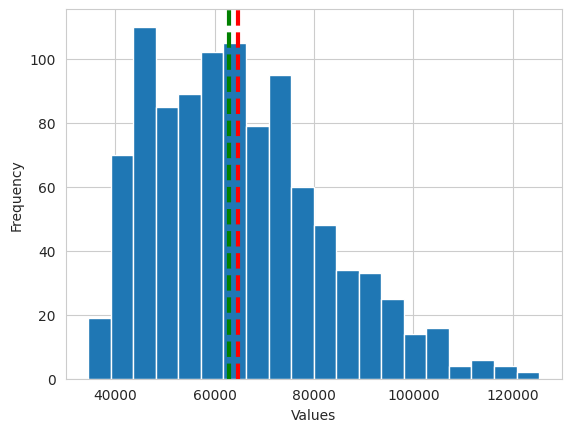

promedio:  64756.504
mediana:  62905.0


In [95]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')

plt.show()


promedio = results_df['Commission_Amount'].mean()
mediana = results_df['Commission_Amount'].median()
print('promedio:  '+str(promedio))
print('mediana:  '+str(mediana))


In [82]:
def calc_commission_rate(x): #x =Pct_TO_Target.   agregar 5% extra a la comisiòn actual
    """ Con base a la tabla de comisiones:
    0-90% = 3%
    91-99% = 4%
    >= 100 = 5%
    """
    if x <= .90:
        return .03
    if x <= .99:
        return .04
    else:
        return .05

print(calc_commission_rate(1))

0.05


### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias.

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_h12 = pd.read_csv('../data/h12.csv')

In [ ]:
df_h12

,Element,Unit,Sample,S,RSD,U
0,Ca,mg/L,3598.922273,NaN,40,NaN
1,Mg,mg/L,1056.487091,NaN,40,NaN
2,Na,mg/L,1680.129729,NaN,40,NaN
3,K,mg/L,249.094420,NaN,40,NaN
4,SO4,mg/L,2896.603374,NaN,40,NaN
5,Cl,mg/L,3509.984386,NaN,40,NaN
6,HCO3,mg/L,1473.160525,NaN,40,NaN
7,CO3,mg/L,4876.165141,NaN,40,NaN


In [ ]:
# Now perform the division operation
df_h12['S_Calc'] = (df_h12['Sample'] * df_h12['RSD']) / 100


In [ ]:
df_h12.head()

,Element,Unit,Sample,S,RSD,U,S_Calc
0,Ca,mg/L,3598.922273,NaN,40,NaN,1439.568909
1,Mg,mg/L,1056.487091,NaN,40,NaN,422.594836
2,Na,mg/L,1680.129729,NaN,40,NaN,672.051892
3,K,mg/L,249.094420,NaN,40,NaN,99.637768
4,SO4,mg/L,2896.603374,NaN,40,NaN,1158.641350


In [ ]:
def PosNormal(df, mean_Head, std_Head, repetitions):
    test = pd.DataFrame()

    #Conversiones
    for k in range(8):
        val = np.array([1])
        for i in range(11):
            #print(i+(11*k))
            np.random.seed(i+(11*k))
            mu = df[mean_Head][k]
            sigma = df[std_Head][k]
            #np.random.randn(1000000) * sigma + mu
            s = abs(np.random.randn(repetitions) * sigma + mu)#, sigma, repetitions))
            #Corroborar si hay elementos negativos
            #np.concatenate((a, b), axis=0)
            val = np.concatenate((val,s), axis=0)
        #print(val[0])
        val = val[1:]
        test["Element"+str(k)] = val
        print("Element " + str(k))
        print(val.size)
        print(min(val))
        print(max(val))
        print(val.mean())
        print(val.std())
        print(val.std()/val.mean()*100)
        count, bins, ignored = plt.hist(val, 50, density=True)
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')

        plt.show()
    return test

Element 0
2200
19.030162916409154
9513.668431689339
3643.093480254931
1427.027624477428
39.17076605944159


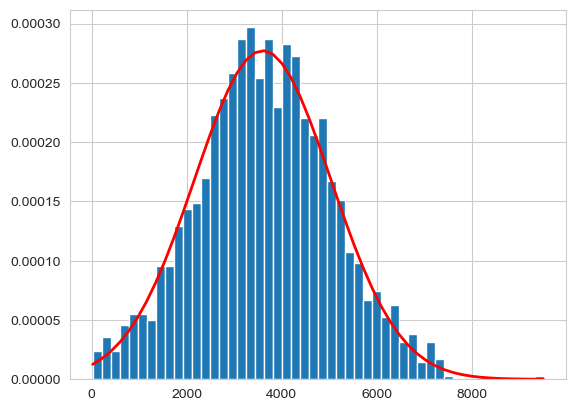

Element 1
2200
5.069251552895821
2470.133333031259
1048.748024003079
415.1448556111235
39.584804558344956


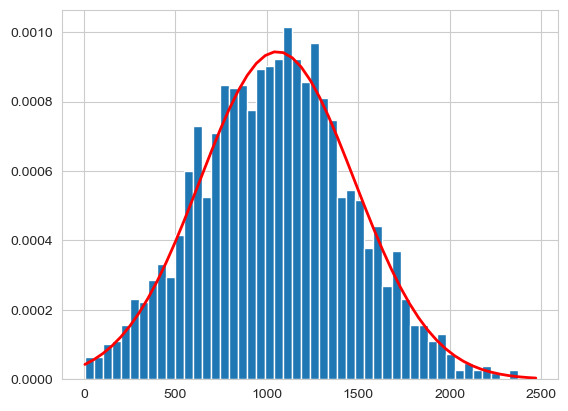

Element 2
2200
4.187096338614992
4366.054092229597
1694.0037418031516
672.4203315407563
39.694146768826535


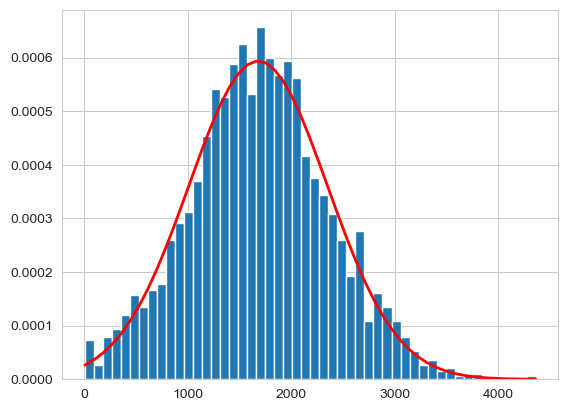

Element 3
2200
0.7013616022794054
591.5941610526685
250.70992505628487
100.6643913736158
40.15173765099904


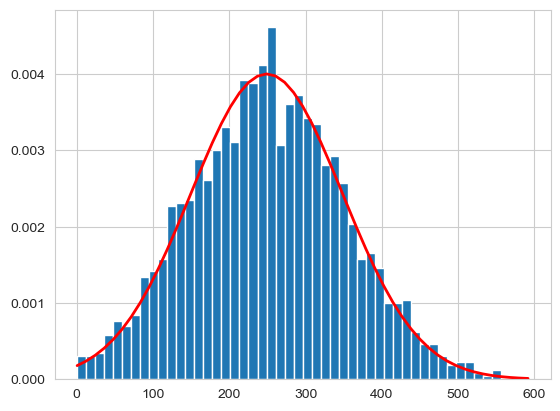

Element 4
2200
41.34294126377699
6736.428105000203
2893.565171881026
1149.7188137438625
39.73364156150879


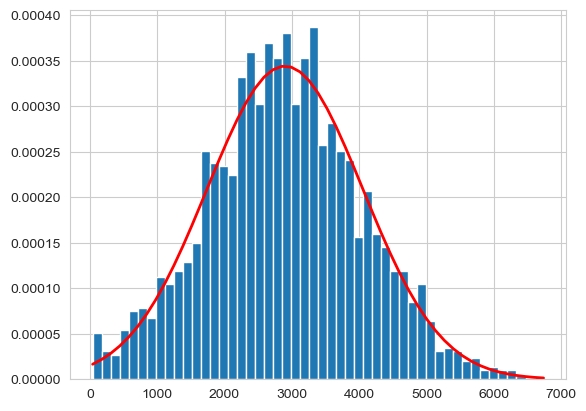

Element 5
2200
17.713815273005366
10231.415312595964
3474.0285682132335
1403.7088961539853
40.405795997122226


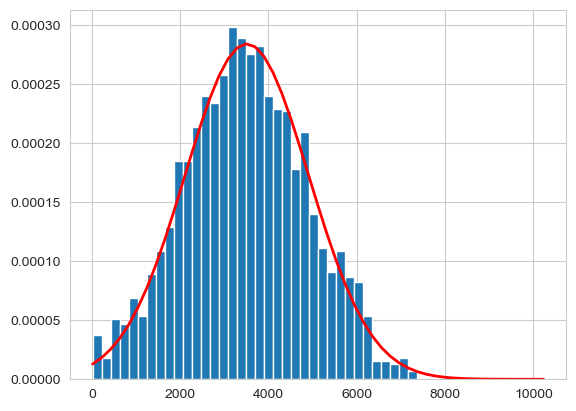

Element 6
2200
1.4496771198428178
3424.231579788435
1487.6581129586407
577.3749251107859
38.81099562334977


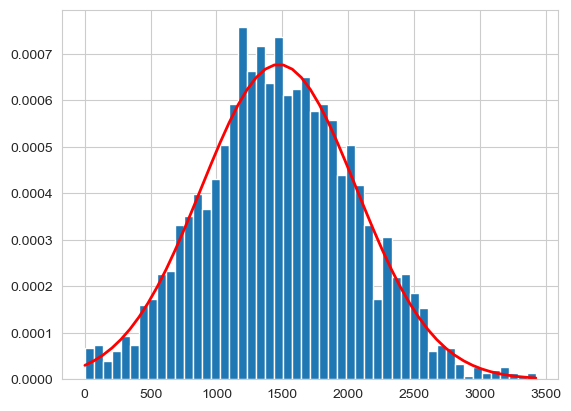

Element 7
2200
24.1950323232968
12744.94045377739
4886.726383508313
1949.680350820423
39.89747323280037


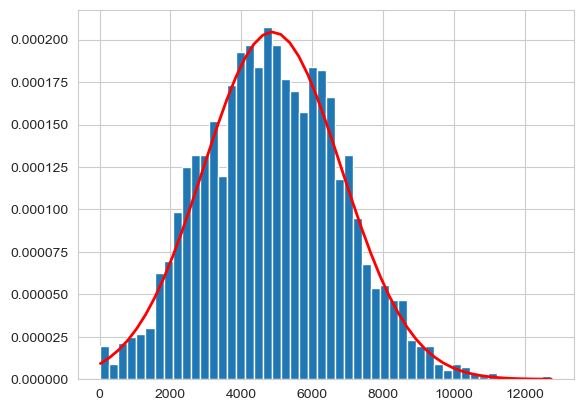

In [ ]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [ ]:
test.describe()

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,3643.093480,1048.748024,1694.003742,250.709925,2893.565172,3474.028568,1487.658113,4886.726384
std,1427.352060,415.239239,672.573206,100.687277,1149.980203,1404.028030,577.506191,1950.123611
min,19.030163,5.069252,4.187096,0.701362,41.342941,17.713815,1.449677,24.195032
25%,2685.652998,759.189190,1255.681451,180.891674,2142.948341,2502.150918,1106.921287,3509.341845
50%,3634.217471,1052.769457,1689.634231,249.885286,2870.690463,3452.127973,1471.874448,4846.899603
75%,4602.370673,1318.628026,2118.682370,318.545706,3644.703657,4430.746827,1873.269257,6244.704142
max,9513.668432,2470.133333,4366.054092,591.594161,6736.428105,10231.415313,3424.231580,12744.940454


In [ ]:
test

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
0,6138.397184,1795.797631,1618.334611,217.324569,2026.910125,1230.276042,2307.331405,5313.937207
1,4174.976149,935.594120,696.682155,89.377015,4421.789401,3367.080381,833.640092,6166.459824
2,5007.883045,851.712368,2407.149873,96.128738,4340.432739,969.048987,1109.992257,3745.367544
3,6824.842451,64.791631,1519.290797,192.260948,1037.081634,3878.748737,1027.136912,5671.587285
4,6287.400692,1052.986049,1350.065464,227.500096,1195.551400,3874.956322,1677.663331,5786.017312
...,...,...,...,...,...,...,...,...
2195,5405.831353,1239.625089,1156.095647,246.565458,5181.261367,3245.182971,2025.411222,4501.444347
2196,4962.375528,1159.589688,1846.874564,269.549376,511.691189,4321.232986,1337.873068,3957.555457
2197,2127.235585,1230.341894,1887.092442,127.173688,2457.530916,2067.114337,1611.932908,6921.658014
2198,5279.141568,1429.544071,2425.293884,295.668090,1708.994043,2876.092783,1606.121397,8221.245797


### Monte carlo - resultados de apuestas

La idea de una **simulación de Monte Carlo** es probar varias posibilidades de resultados.

En realidad, solo se cumplirá una de las posibilidades de resultado, pero, en términos de evaluación de riesgos, cualquiera de las posibilidades podría haber ocurrido.

Monte Carlo se utiliza a menudo para evaluar el riesgo de una estrategia comercial determinada, por ejemplo, con opciones o acciones.

---
Los simuladores de Montecarlo pueden ayudar a aclarar que el éxito y el resultado no son la única medida de si una elección fue buena o no.

Las opciones no deben evaluarse después de su resultado. En cambio, los riesgos y beneficios solo deben considerarse en el momento en que se tomó la decisión, sin sesgos retrospectivos. Un simulador de monte carlo puede ayudar a visualizar la mayoría o todos los resultados potenciales para tener una idea mucho mejor sobre el riesgo de una decisión.

---

Con eso, consideremos un ejemplo básico. Aquí, consideraremos un escenario de juego, donde un usuario puede *lanzar* los dados metafóricos para un resultado de 1 a 100.

* Condiciones: Si el usuario saca algo del 1 al 50, la *casa* gana. Si el usuario obtiene un resultado entre 51 y 99, el "usuario" gana. Si el usuario saca un 100, pierde.

---

Con esto, la casa mantiene una ventaja del 1%, que es mucho menor que la ventaja típica de la casa, así como la ventaja del mercado cuando se incorporan los costos de negociación.

---

Monte Carlo también puede ayudar a ilustrar los defectos de la [falacia del jugador](https://psicologiaymente.com/psicologia/falacia-del-jugador). Muchos jugadores, y en ocasiones especialmente los jugadores que entienden las estadísticas, son víctimas de la falacia del jugador.

La falacia afirma que_

* **tomando algo como lanzar una moneda por cara o cruz, tiene una probabilidad conocida de 50/50. Dicho esto, si caen cara cinco veces seguidas, de alguna manera es más probable que caiga cruz a continuación.**

No importa cuántas caras hayan precedido, sus probabilidades, cada vez que lanza la moneda, son 50/50. Es fácil caer en la trampa de pensar que, en una escala a largo plazo, las probabilidades se correlacionarán con 50/50, por lo tanto, si las probabilidades están desequilibradas actualmente, las probabilidades del próximo lanzamiento tampoco son 50/50.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 usuarios ganan. Un 100 perfecto significa que la casa gana.

[64, 100, 44, 40, 28, 82, 50, 10, 32, 91, 85, 36, 7, 23, 15, 68, 83, 52, 41, 87, 25, 24, 50, 91, 96, 19, 81, 46, 98, 48, 66, 70, 93, 81, 77, 79, 33, 33, 80, 60, 53, 47, 61, 25, 65, 42, 88, 66, 73, 68, 20, 82, 66, 67, 56, 44, 11, 53, 13, 82, 51, 22, 17, 81, 78, 7, 63, 41, 27, 66, 66, 84, 79, 51, 37, 96, 3, 66, 24, 40, 87, 54, 88, 15, 60, 28, 100, 66, 15, 63, 35, 25, 91, 16, 94, 74, 87, 28, 79, 4]


(array([ 6.,  9., 11.,  9., 10.,  8., 15.,  8., 14., 10.]),
 array([  3. ,  12.7,  22.4,  32.1,  41.8,  51.5,  61.2,  70.9,  80.6,
         90.3, 100. ]),
 <BarContainer object of 10 artists>)

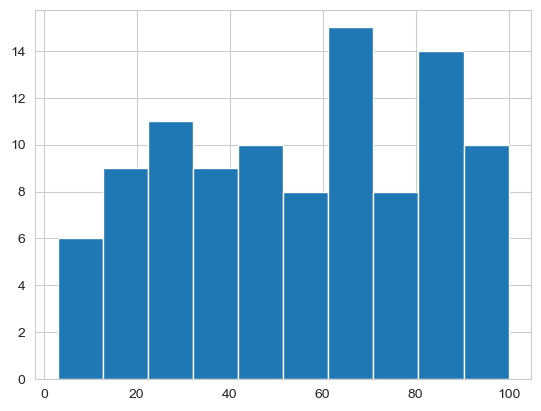

In [ ]:
import random

def rollDice():
    roll = random.randint(1,100)
    return roll

# Now, just to test our dice, let's roll the dice 100 times.

x = 0
results=[]
for x in range(0,100):

    results.append(rollDice())

print(results)
plt.hist(results)

Ahora necesitamos crear un apostador. Eventualmente, crearemos algunos apostadores más sofisticados, pero comenzaremos extremadamente básicos por ahora, ya que incluso el apostador simplista realmente nos mostrará algunas cosas fascinantes en lo que respecta al azar y la posibilidad, usando un generador de monte carlo.

In [ ]:
import random

# let us go ahead and change this to return a simple win/loss
def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        print( roll,'el valor fue de 100, has perdido. Play again!')
        return False
    elif roll <= 50:
        print (roll,'el valor fue de 1-50, has perdido.')
        return False
    elif 100 > roll >= 50:
        print (roll,'el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)')
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager

    currentWager = 0

    while currentWager < wager_count:
        if rollDice():
            value += wager
        else:
            value -= wager

        currentWager += 1
        print ('Funds:', value)



simple_bettor(1000,100,100)

47 el valor fue de 1-50, has perdido.
Funds: 900
29 el valor fue de 1-50, has perdido.
Funds: 800
100 el valor fue de 100, has perdido. Play again!
Funds: 700
25 el valor fue de 1-50, has perdido.
Funds: 600
6 el valor fue de 1-50, has perdido.
Funds: 500
58 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 600
73 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 700
81 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 800
55 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 900
88 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1000
22 el valor fue de 1-50, has perdido.
Funds: 900
84 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1000
64 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1100
30 el valor fue de 1-50, has perdido.
Funds: 1000
16 el valor fue de 1-50, has perdido.
Funds: 900
6 el 

Una de las ideas brillantes más comunes que se le ocurren a las personas es duplicar las pérdidas. Por lo tanto, si pierde, simplemente duplica la cantidad de la apuesta anterior. Continúas esto hasta que ganes.

Si tiene dinero ilimitado, esta estrategia funciona, pero no siempre es así.... Todo lo que hace esta estrategia es acelerar el proceso. Una vez más, cada vez que apuesta, se enfrenta a todas las probabilidades. No puedes evitarlos. De todos modos, ¡lo vamos a ilustrar!

ganamos la última apuesta, yay!
900
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 200
700
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 400
1100
ganamos la última apuesta, yay!
1000
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1200
ganamos la última apuesta, yay!
1100
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1300
ganamos la última apuesta, yay!
1200
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1400
ganamos la última apuesta, yay!
1300
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1500
ganamos la última apuesta, yay!
1400
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1600
ganamos la última apuesta, yay!
1500
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 200
1300
Perdimos el último, así que s

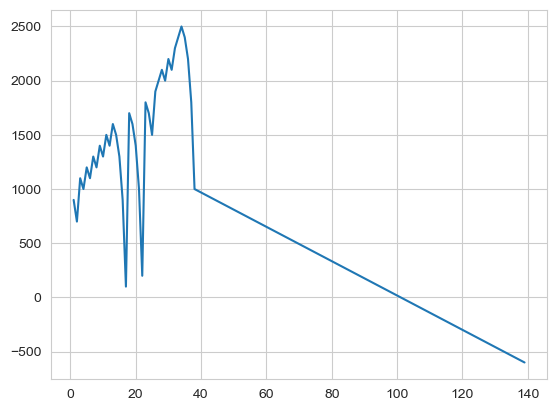

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
#
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # ya que apostaremos basándonos en el resultado de la apuesta anterior #
    previousWager = 'win'

    # ya que estaremos doblando #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            print ('ganamos la última apuesta, yay!')
            if rollDice():
                value += wager
                print (value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                print (value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,' apuestas')
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            print ('Perdimos el último, así que seremos super inteligentes y duplicaremos.!')
            if rollDice():
                wager = previousWagerAmount * 2
                print ('ganamos',wager)
                value += wager
                print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                print ('permidos',wager)
                value -= wager
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 100
                print (value)
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 100

        currentWager += 1

    print( value)
    plt.plot(wX,vY)

doubler_bettor(1000,100,100)
plt.show()


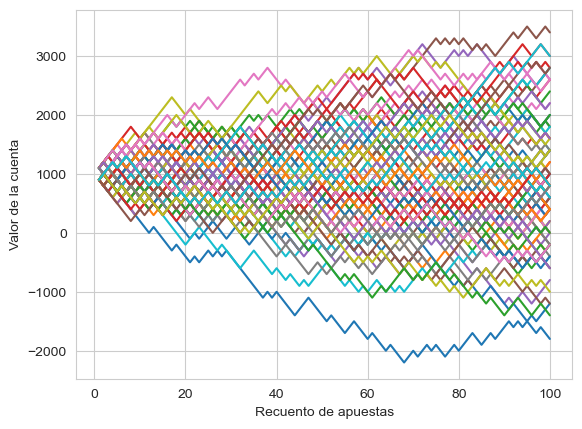

In [ ]:

'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)
        currentWager += 1
    plt.plot(wX,vY)

x = 0

while x < 100:
    simple_bettor(1000,100,100)
    x += 1

plt.ylabel('Valor de la cuenta')
plt.xlabel('Recuento de apuestas')
plt.show()

Por eso los jugadores pierden. Por lo general, las probabilidades no están muy en contra de ellos, solo un poco. Los casinos simplemente entienden la psicología básica, sabiendo que *ganar* es extremadamente adictivo. Los casinos están diseñados para mantenerte dentro y seguir jugando.

A corto plazo, la mayoría de los jugadores realmente no se dan cuenta de que es seguro que perderán, las victorias y las derrotas parecen bastante parecidas. Algunas personas, casi la mitad, están estadísticamente seguras de que realmente se beneficiarán. El problema es que esto es adictivo y quieren seguir haciéndolo. Terminan continuando, y la mayoría termina devolviendo sus ganancias. Es simple matemática, pero la psicología humana es débil.

En este punto, los apostadores, con su mente de apostador, comienzan a imaginar varias estrategias para superar sus probabilidades.

Una de las prácticas más comunes aquí es duplicar las pérdidas. Entonces, si pierde, simplemente duplique su apuesta hasta que gane. Una vez que hayas ganado, vuelves a tu punto de partida. Solo necesitamos esa ventaja del 1%, debería ser muy fácil, ¿verdad?



---
---
---
<a id="f"></a>
<h1><center>Referencias y links de interés</center></h1>

[Regreso a contenido](#contenido)

---

* [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros)
* Información extra de [Métodos Monte Carlo](https://www.statisticshowto.com/monte-carlo-simulation/)
* Información sobre algoritmo [Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)
* M. Matsumoto and T. Nishimura (1998) - [Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator](https://dl.acm.org/doi/10.1145/272991.272995)

* [Cadenas de Markov](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)
* [Más de MCMC](http://people.duke.edu/~ccc14/sta-663/MCMC.html)

**Tutoriales MCMC**
* [Tutorial MCMC - Inferencia Bayesiana](https://nbviewer.org/github/yoyolin/mcmc-tutorial/blob/master/MCMC_for_Bayesian_Inference.ipynb)

* [Otro ejemplo MCMC](https://github.com/prappleizer/prappleizer.github.io/blob/master/Tutorials/MCMC/MCMC_Tutorial_Solution.ipynb)

* [Artículo - Data Analysis Recipes: Using MCMC](https://iopscience.iop.org/article/10.3847/1538-4365/aab76e/pdf)
--------

* La [falacia del jugador: qué es y cómo nos afecta](https://psicologiaymente.com/psicologia/falacia-del-jugador)
* [Funciones en python](https://docs.python.org/3/tutorial/classes.html)

* [Función lambda](https://www.w3schools.com/python/python_lambda.asp)
* [likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)
* [cdf](https://dlsun.github.io/symbulate/joint.html)
